# Simple shading

This is a single cell notebook to demonstrate temperature plotting using Magics' **area_fill** contour shade method and letting Magics calculate colours between blue and red.

### Installing Magics
If you don't have Magics installed, run the next cell to install Magics using conda.

In [ ]:
# Install Magics in the current Jupyter kernel
import sys
!conda install --yes --prefix {sys.prefix} Magics

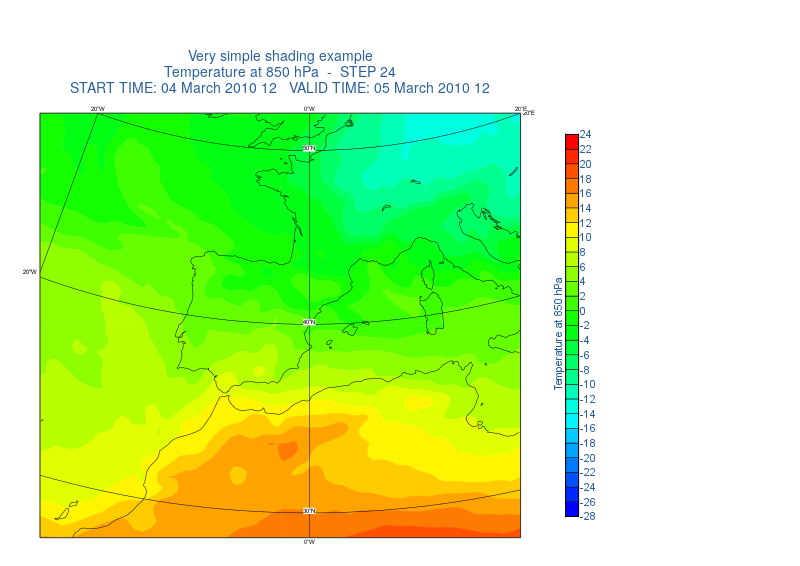

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name    = "south_west_europe",
    page_id_line             = "off"
)

#Setting the coastline
coast = magics.mcoast()

#Loading GRIB file
temperature = magics.mgrib(grib_input_file_name = "../../data/t850.grib")

#Defining the contour
contour = magics.mcont( 
    contour                        = "off",
    contour_level_selection_type   = "interval",
    contour_interval               = 2.00,
    contour_shade                  = "on",
    contour_shade_method           = "area_fill",
    contour_shade_min_level        = -28,
    contour_shade_max_level        = 24,
    contour_shade_colour_method    = "calculate",
    contour_shade_colour_direction = "clockwise",
    contour_highlight              = "off",
    contour_label                  = "off",
    contour_shade_max_level_colour = "red",
    contour_shade_min_level_colour = "blue",
    legend = "on"
)

#Defining the legend
legend = magics.mlegend(
    legend_display_type       = "continuous",
    legend_automatic_position = "right",
    legend_title              = "on",
    legend_title_text         = "Temperature at 850 hPa",
    legend_text_font_size     = "0.45",
    legend_text_colour        = "#2b619e",
    legend_label_frequency    = 1)

#Setting the title
title = magics.mtext( 
    text_lines          = ["Very simple shading example",
                           "<grib_info key='name'/> at <grib_info key='level'/> hPa  -  STEP <grib_info key='step'/>",
                           "START TIME: <grib_info key='base-date' format='%d %B %Y %H'/>   VALID TIME: <grib_info key='valid-date' format='%d %B %Y %H'/>"],
    text_justification  = 'center',
    text_font_size      = 0.6,
    text_mode           = "automatic",
    text_colour         = "#2b619e") 

#Plotting
magics.plot(projection, temperature, contour, coast, legend, title)